# 4.9 Data Viz

## This script contains following points:
- Importing libraries (including libraries for vis: matplotlib, seaborn, scipy)
- Creating bar chart (changing its order by index, adding colors to bars) and exporting bar chart as image outside of Jupyter
- Creating Histogram and Scatterplot (cleaning prices column: changing prices over $100 to NaN)
- Sampling Data and creating line chart for small sample


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Path to the original data
path= r"/Users/mentaykoshzhanova/Desktop/Instacart Basket Analysis"
path

'/Users/mentaykoshzhanova/Desktop/Instacart Basket Analysis'

In [7]:
# Import dataframe
ords_prods_grouped= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_grouped.pkl'))

In [8]:
ords_prods_grouped.head()

,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0_x,user_id,order_number,order_day_of_week,order_time,days_since_prior_order,...,product_name,aisle_id,department_id,prices,exists,price_range_loc,price_ranged_loc,Busiest days,Busiest_period_of_day,Busiest day
0,2,33120,1,1,3355525,202279,3,5,9,8.0,...,Organic Egg Whites,86,16,11.3,both,Mid-range product,NaN,Regularly busy,Most orders,Regularly busy
1,26,33120,5,0,2549350,153404,2,0,16,7.0,...,Organic Egg Whites,86,16,11.3,both,Mid-range product,NaN,Busiest days,Most orders,Busiest days
2,120,33120,13,0,395303,23750,11,6,8,10.0,...,Organic Egg Whites,86,16,11.3,both,Mid-range product,NaN,Regularly busy,Average orders,Regularly busy
3,327,33120,5,1,976751,58707,21,6,9,8.0,...,Organic Egg Whites,86,16,11.3,both,Mid-range product,NaN,Regularly busy,Most orders,Regularly busy
4,390,33120,28,1,2764474,166654,48,0,12,9.0,...,Organic Egg Whites,86,16,11.3,both,Mid-range product,NaN,Busiest days,Most orders,Busiest days


## Creating Bar chart and exporting it outside of Jupyter

<Axes: >

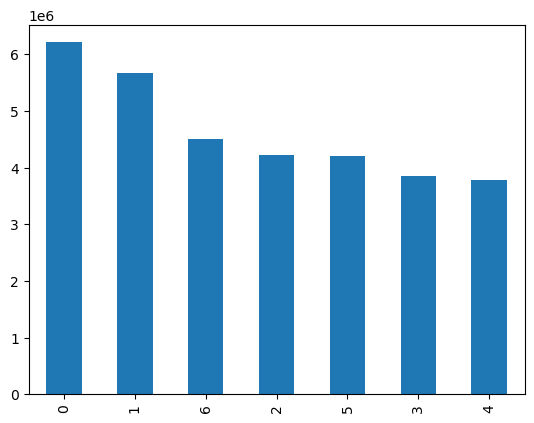

In [10]:
# Creating Bar chart for the column orders_day_of _week of ords_prods_grouped df (creates bar from largest to smallest values)
ords_prods_grouped['order_day_of_week'].value_counts().plot.bar()

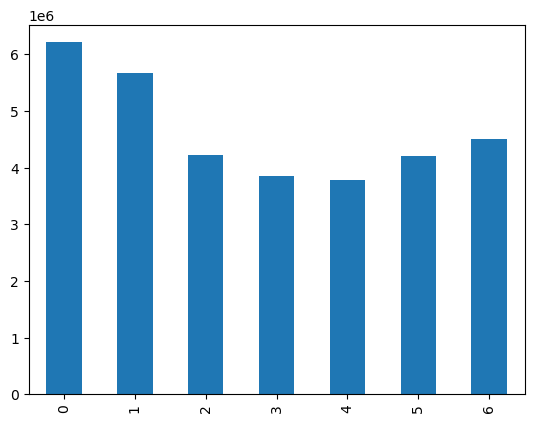

In [11]:
# Changing the bar chart to show values in order by their index
bar = ords_prods_grouped['order_day_of_week'].value_counts().sort_index().plot.bar()

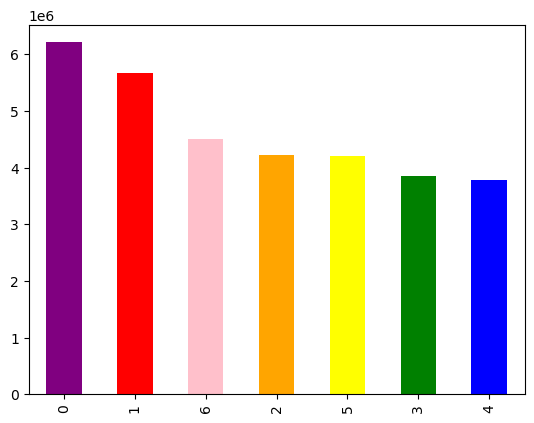

In [14]:
# Adding colors to bars 
bar = ords_prods_grouped['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [16]:
# Export it outside of Jupyter in the form of an image file 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Creating histograms and Scatterplots

<Axes: ylabel='Frequency'>

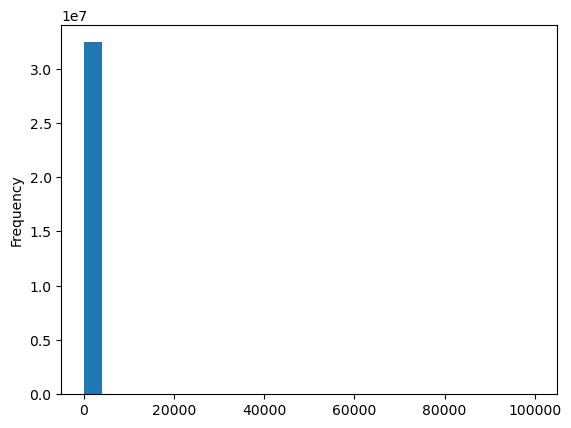

In [17]:
# Create histogram for prices column
ords_prods_grouped['prices'].plot.hist(bins = 25)

In [18]:
# This should have shown 25 bars instead of one, gotta run describe for prices column to see what is off
ords_prods_grouped['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [20]:
# Gotta run mean, median and max to see closer
ords_prods_grouped['prices'].mean()

11.981143922966321

In [21]:
ords_prods_grouped['prices'].median()

7.4

In [22]:
ords_prods_grouped['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

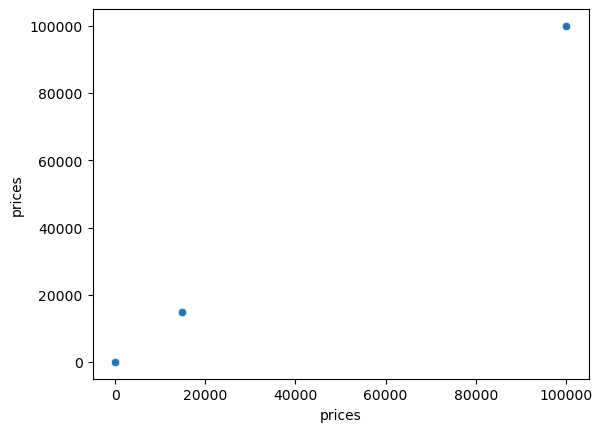

In [25]:
# Use scatterplot to see in vis the outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_grouped)

In [26]:
# Determine whether there are any values above a certain threshold in data,anything above the “normal” price of a supermarket item.
ords_prods_grouped.loc[ords_prods_grouped['prices'] > 100]

,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0_x,user_id,order_number,order_day_of_week,order_time,days_since_prior_order,...,product_name,aisle_id,department_id,prices,exists,price_range_loc,price_ranged_loc,Busiest days,Busiest_period_of_day,Busiest day
5993732,43,21553,6,1,657866,39630,14,5,17,4.0,...,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,NaN,Regularly busy,Average orders,Regularly busy
5993733,950,21553,20,0,3115409,187854,16,1,11,16.0,...,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,NaN,Busiest days,Most orders,Regularly busy
5993734,1115,21553,14,1,2786355,168014,15,6,14,30.0,...,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,NaN,Regularly busy,Most orders,Regularly busy
5993735,1155,21553,18,1,1728457,103747,22,1,13,12.0,...,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,NaN,Busiest days,Most orders,Regularly busy
5993736,1220,21553,19,0,390850,23475,3,0,17,26.0,...,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,NaN,Busiest days,Average orders,Busiest days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28384240,3407607,33664,9,1,245911,14872,17,4,21,13.0,...,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,NaN,Slowest days,Average orders,Regularly busy
28384241,3409400,33664,1,1,1178612,70851,10,5,9,5.0,...,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,NaN,Regularly busy,Most orders,Regularly busy
28384242,3414106,33664,5,1,1857363,111487,25,6,7,9.0,...,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,NaN,Regularly busy,Average orders,Regularly busy
28384243,3417702,33664,13,0,1178278,70821,5,2,14,18.0,...,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,NaN,Regularly busy,Most orders,Regularly busy


In [27]:
# Mark 'prices over $100' as missing since they don’t make sense in terms of the other values in the column. 
# Turn them into NaNs: 
ords_prods_grouped.loc[ords_prods_grouped['prices'] >100, 'prices'] = np.nan

In [28]:
# Check max of prices to see if np.nan worked
ords_prods_grouped['prices'].max()

25.0

<Axes: ylabel='Frequency'>

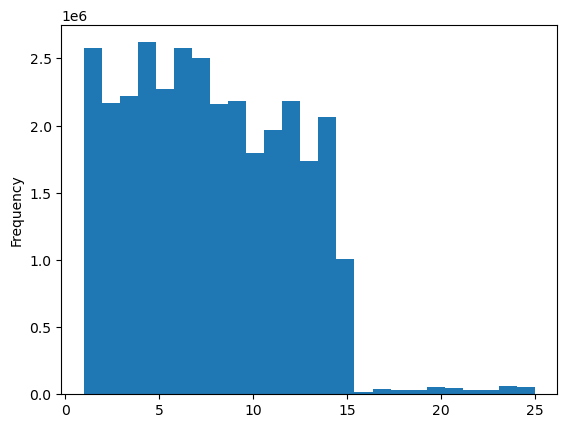

In [29]:
# Try creating scatterplot again 
ords_prods_grouped['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

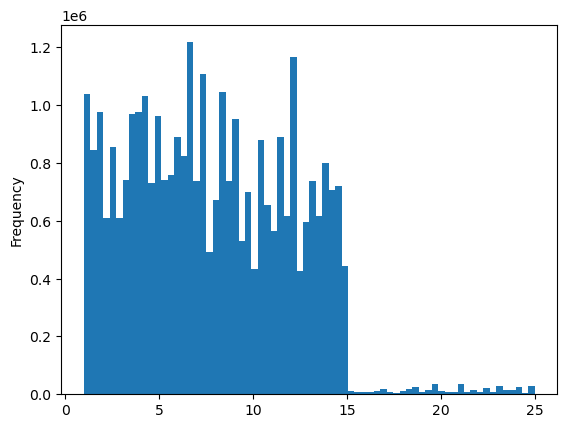

In [31]:
# Change frequency of bins to 70 (for thinner bars)
ords_prods_grouped['prices'].plot.hist(bins = 70)

### Creating Line charts

### Sampling Data
To avoid Mac crash sampling will be used. Subset wouldn't be representative of the entire population vs sampling. 


In [33]:
# In a 70/30 split, 30% sample would statistically resemble the 70% sample but contain less rows.
# Create the sample using np
np.random.seed(4)
# Create a list holding True/False values to the test np.random.rand <=0.7
dev = np.random.rand(len(ords_prods_grouped)) <= 0.7

In [34]:
# Store 70% of sample in df big
big = ords_prods_grouped[dev]

In [35]:
# Store 30% of sample in df small
small = ords_prods_grouped[~dev]

In [38]:
# Create df that contains only columns needed for the chart to speed up the process
df_sample = small[['order_day_of_week','prices']]

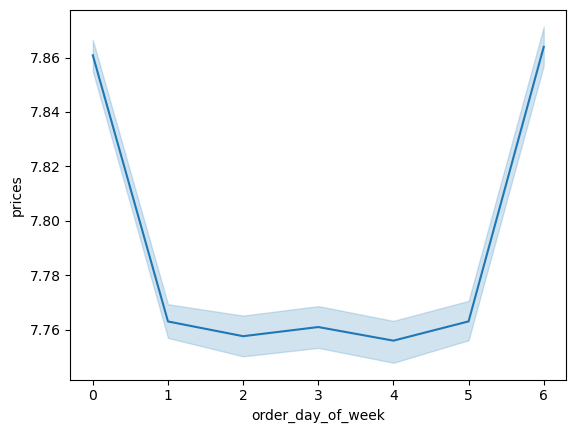

In [39]:
# Create a line chart to show the development of the “prices” column across the days of the week.
line = sns.lineplot(data = df_sample, x = 'order_day_of_week',y = 'prices')